In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import itertools

In [3]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [4]:
plt.style.use('dark_background')

In [5]:
def value(playerHand):
    sumValue = 0
    isAceInHand = 0
    for aCard in playerHand:
        aValue = cardValueDict[aCard]
        if aCard=='A':
            isAceInHand += 1
        sumValue += aValue
    if sumValue<12 and isAceInHand>0:
        sumValue += 10
    return(sumValue)

def valueArray(samples):
    points = []
    for aSample in samples:
        points.append(value(aSample))
    return(points)

In [6]:
def possibleOutcome(playingCard,playerHand,depth=1):
    depth = int(depth)
    depthSampleSpace = list(itertools.combinations(playingCard, depth)) #For combination in depth
    reduceSampleSpace = list(itertools.product(playerHand,depthSampleSpace)) #Combine with player hand
    if len(playerHand)==0:
        reduceSampleSpace = depthSampleSpace 
    sampling = []
    for i in range(len(reduceSampleSpace)):
        if len(playerHand)!=0:
            sampling.append([reduceSampleSpace[i][0],*reduceSampleSpace[i][1] ])
        else:
            sampling.append([*reduceSampleSpace[i]])
    return(sampling)

In [24]:
card  = ['A',*[str(i) for i in range(2,11)],'J','Q','K']
suite = ['clubs','diamond','hearts','spades']
cardValue = [*range(1,11),10,10,10] #order sensitive card and value 

cardValueDict = {}
for i in range(len(card)):
    cardValueDict[card[i]] = cardValue[i]

#Playing card is available card in player hand
playingCard = card*len(suite)
playingCardValue = cardValue

In [8]:
p1 = random.choices(playingCard, k=2)
playingCard.remove(p1[0])
playingCard.remove(p1[1])
pHouse = random.choices(playingCard, k=2)
playingCard.remove(pHouse[0])
p1PlayingCard = list(playingCard) #Known playing cards from p1 pov

playingCard.remove(pHouse[1]) #player one won't know

In [9]:
sample = possibleOutcome(playingCard,['K'],depth = 2)

In [10]:
sample = possibleOutcome(playingCard, [], depth=3)
sample2Cards = np.array(sample)[:,:2]

In [11]:
np.shape(sample2Cards)

(17296, 2)

In [14]:
busted = [1 for s in value(sample) if s>21]
value = [aSample for aSample in sample2Cards]

TypeError: unhashable type: 'list'

In [15]:
plt.plot(value,busted, '.')

NameError: name 'busted' is not defined

In [ ]:
for aSample in sample:
    sumOf2 = np.sum(vaaSample) 
    sumOf3 = 

In [ ]:
type(playingCard)

In [25]:
len(playingCard)

52

In [16]:
probBustedN = []
for i in range(8):
    print('i = '+str(i))
    sample = possibleOutcome(playingCard, [], depth=i)
    busted = [1 for aSample in valueArray(sample) if aSample>21]
    probBusted = np.sum(busted)/len(sample)
    probBustedN.append(probBusted)

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7


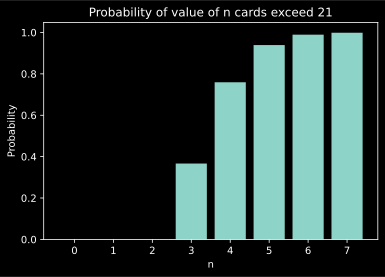

In [17]:
fig, ax = plt.subplots()

ax.set_title('Probability of value of n cards exceed 21')
ax.set_xlabel("n")
ax.set_ylabel('Probability')
ax.bar(range(8), probBustedN)
# ax.plot(probBustedN,'.')
plt.savefig("ProbabilityBustedN.svg")

In [18]:
#probabilit of getting busted when draw the (n+1)th card
nPlusOne = []
probBustedAtN = []
for i in range(len(probBustedN)-1):
    nPlusOne.append(i+1)
    probBustedAtN.append((probBustedN[i+1]-probBustedN[i])/(1-probBustedN[i]))


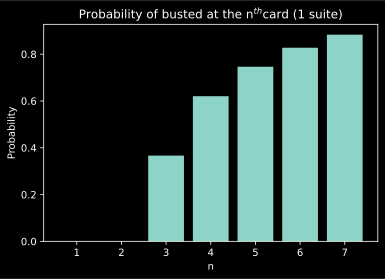

In [19]:
fig, ax = plt.subplots()

ax.set_title('Probability of busted at the n'+r'$^{th}$'+'card (4 suits)')
ax.set_xlabel("n")
ax.set_ylabel('Probability')

ax.bar(nPlusOne,probBustedAtN)
plt.savefig('Probability of busted at the nth card.svg')

In [77]:
probBustedAtN[-1]

1.0

In [71]:
len(sample)

1716

In [ ]:
notBusted = [aSample for aSample in valueArray(sample) if aSample<=21]